# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

from citipy import citipy

# Output File to CSV
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# make empty list
lat_lngs = []
cities = []

# Create set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Begin data gathering")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Next city...")
        pass
              
# Notify that loading of data is complete 
print("-----------------------------")
print("Data gathering done     ")
print("-----------------------------")
        
        

Begin data gathering
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | honningsvag
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | nuuk
Processing Record 6 of Set 1 | sisak
Processing Record 7 of Set 1 | tugolesskiy bor
Processing Record 8 of Set 1 | horsham
Processing Record 9 of Set 1 | beatrice
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ola
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | muros
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | arlit
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | wellington
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | nishihara
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Set 1 | fortuna
Processing Record 24 of 

Processing Record 37 of Set 4 | yongan
Processing Record 38 of Set 4 | caraquet
Processing Record 39 of Set 4 | paamiut
Processing Record 40 of Set 4 | veendam
Processing Record 41 of Set 4 | qixingtai
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 4 | tura
Processing Record 45 of Set 4 | alekseyevka
Processing Record 46 of Set 4 | jaumave
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 49 of Set 4 | alta floresta
Processing Record 0 of Set 5 | weligama
Processing Record 1 of Set 5 | katobu
Processing Record 2 of Set 5 | maloy
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 5 | cairns
Processing Record 5 of Set 5 | umm lajj
Processing Record 6 of Set 5 | leningradskiy
Processing Record 7 of Set 5 | mzimba
Processing Record 8 of Set 5 | dumai
Processing Record 

Processing Record 27 of Set 8 | obo
Processing Record 28 of Set 8 | kortkeros
Processing Record 29 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 30 of Set 8 | tucuma
Processing Record 31 of Set 8 | rosarito
Processing Record 32 of Set 8 | mbini
Processing Record 33 of Set 8 | shikhazany
Processing Record 34 of Set 8 | humboldt
Processing Record 35 of Set 8 | basoko
Processing Record 36 of Set 8 | aykhal
Processing Record 37 of Set 8 | camacupa
Processing Record 38 of Set 8 | felipe carrillo puerto
Processing Record 39 of Set 8 | mookane
Processing Record 40 of Set 8 | playa del carmen
Processing Record 41 of Set 8 | cayambe
Processing Record 42 of Set 8 | fethiye
Processing Record 43 of Set 8 | wattegama
Processing Record 44 of Set 8 | sisimiut
Processing Record 45 of Set 8 | quatre cocos
Processing Record 46 of Set 8 | malinovoye ozero
Processing Record 47 of Set 8 | phan rang
City not found. Skipping...
Processing Record 48 of Set 8 | tuatapere
Proce

Processing Record 11 of Set 12 | yinchuan
Processing Record 12 of Set 12 | victoria
Processing Record 13 of Set 12 | trelew
Processing Record 14 of Set 12 | luebo
Processing Record 15 of Set 12 | bonfim
Processing Record 16 of Set 12 | gisborne
Processing Record 17 of Set 12 | berlevag
Processing Record 18 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 19 of Set 12 | jahrom
City not found. Skipping...
Processing Record 20 of Set 12 | walvis bay
Processing Record 21 of Set 12 | pirenopolis
Processing Record 22 of Set 12 | battle creek
Processing Record 23 of Set 12 | baghdad
Processing Record 24 of Set 12 | richards bay
Processing Record 25 of Set 12 | denpasar
Processing Record 26 of Set 12 | saint-pierre
Processing Record 27 of Set 12 | soyo
Processing Record 28 of Set 12 | riyadh
Processing Record 29 of Set 12 | talca
Processing Record 30 of Set 12 | luzhou
Processing Record 31 of Set 12 | moranbah
Processing Record 32 of Set 12 | gladstone
Processing Recor

In [6]:
# Convert JSON array PD
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
Date          537
dtype: int64

In [7]:
# show city DF
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahebourg,-20.4081,57.7000,86.00,66,75,11.50,MU,1612944564
1,honningsvag,70.9821,25.9704,23.00,86,90,23.02,NO,1612944564
2,vaini,-21.2000,-175.2000,78.80,94,40,13.80,TO,1612944565
3,guerrero negro,27.9769,-114.0611,55.29,86,0,9.95,MX,1612944565
4,nuuk,64.1835,-51.7216,26.60,80,75,2.30,GL,1612944565


In [8]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,5.370000e+02
mean,19.480067,23.131376,50.592663,72.705773,54.554935,7.630875,1.612945e+09
std,33.848735,89.160952,32.730054,21.391758,40.047002,5.679249,7.305546e+01
min,-54.800000,-179.166700,-41.800000,10.000000,0.000000,0.290000,1.612944e+09
25%,-8.578500,-56.154900,23.490000,64.000000,3.000000,3.440000,1.612945e+09
50%,24.483300,26.891000,62.890000,79.000000,70.000000,6.310000,1.612945e+09
75%,48.282000,103.110600,77.220000,88.000000,95.000000,10.360000,1.612945e+09
max,78.218600,179.316700,102.000000,100.000000,100.000000,31.680000,1.612945e+09


In [9]:
#index of cities over 100%
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahebourg,-20.4081,57.7000,86.00,66,75,11.50,MU,1612944564
1,honningsvag,70.9821,25.9704,23.00,86,90,23.02,NO,1612944564
2,vaini,-21.2000,-175.2000,78.80,94,40,13.80,TO,1612944565
3,guerrero negro,27.9769,-114.0611,55.29,86,0,9.95,MX,1612944565
4,nuuk,64.1835,-51.7216,26.60,80,75,2.30,GL,1612944565


In [11]:
# Extract relevant info from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export to csv on root folder
clean_city_data.to_csv('cities.csv')

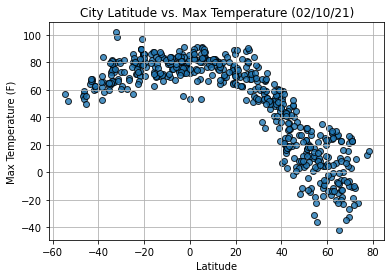

In [12]:
# Latitude vs. temperature scatter plot
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save graph as image, i'm saving them all in the root folder. Thank you.
plt.savefig("Fig1.png")

# Show plot
plt.show()

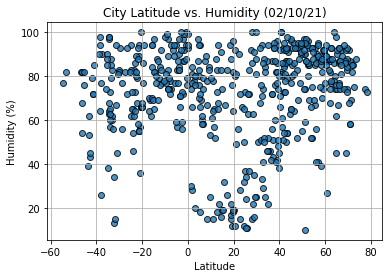

In [13]:
#latitude vs. humidity scatter plot
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# c
plt.savefig("Fig2.png")

# Show plot
plt.show()

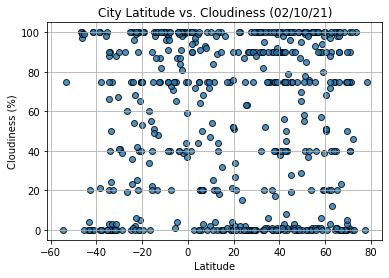

In [14]:
# latitude vs. cloudiness scatter plot
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save graph as image
plt.savefig("Fig3.png")

# Show plot
plt.show()

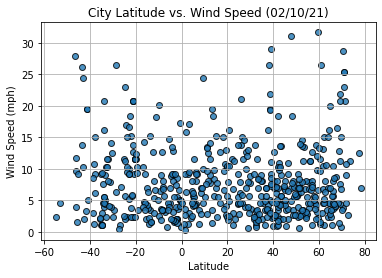

In [15]:
#latitude vs. wind speed scatter plot
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save graph as image
plt.savefig("Fig4.png")

# Show plot
plt.show()

In [16]:
#Linear Regression plots function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Southern hemisphere regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # the Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [17]:
# DF for Northern and Southern Hemisphere
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

The r-value is: 0.7816146519545956


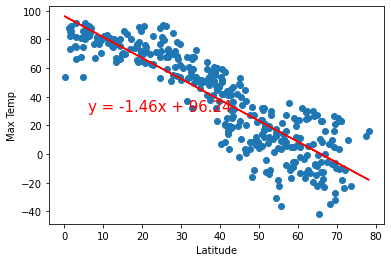

In [18]:
#Northern Hemisphere Linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.2564374036943393


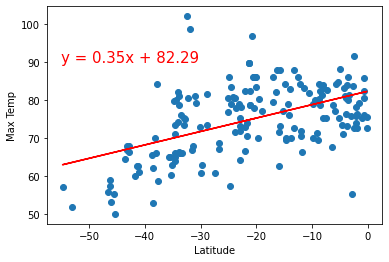

In [19]:
#Southern Hemisphere linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

The r-value is: 0.11550733124533016


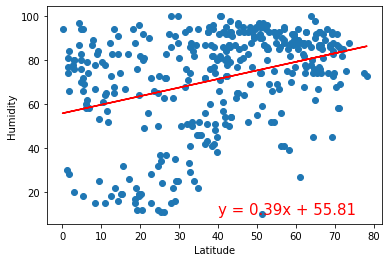

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.09476038880437573


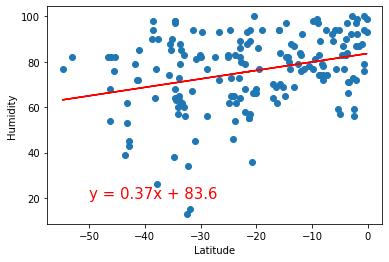

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The r-value is: 0.0008974170842930445


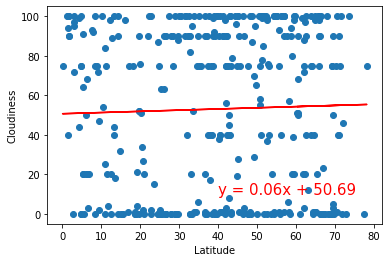

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.13775248619999927


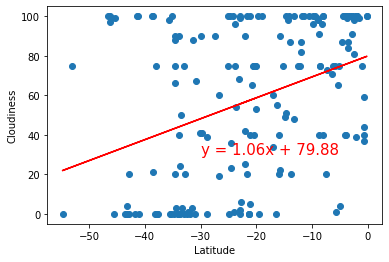

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The r-value is: 0.00675122591682813


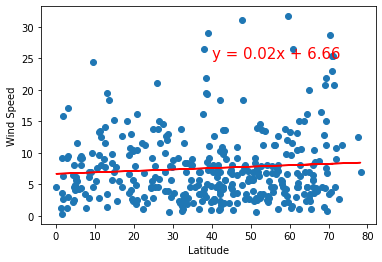

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.03930630385594039


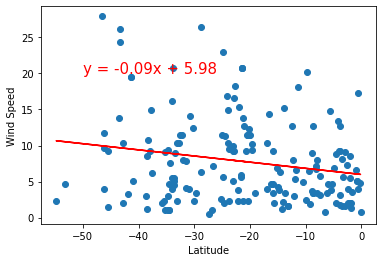

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))